In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import spearmanr
bbox = dict(boxstyle ="round", fc ="0.8")

In [2]:
def annotate(ax, data):
    r, p = stats.pearsonr(data['Баллы ЕГЭ'], data['Баллы тестирования'])
    c_ount = len(data.index)
    ax.set_title(data['Дисциплина'].unique()[0])
    ax.set_ylim([0, 10])
    ax.text(.02, .95, 'r = {:.4f}, p = {:.0e}, кол-во = {}'.format(r, p, c_ount), transform=ax.transAxes, bbox=bbox)
#plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)

In [3]:
def annotate_mean_ege(ax, data):
    ege = np.mean(data[data['тип'] == 'ЕГЭ']['Баллы ЕГЭ (ВИ)'])
    vi = np.mean(data[data['тип'] == 'ВИ']['Баллы ЕГЭ (ВИ)'])
    #ax.set_title(data['Дисциплина'].unique()[0])
    #ax.set_ylim([0, 10])
    ax.text(.02, .95, 'Баллы ср. ЕГЭ={:.2f}, ср. ВИ={:.2f} '.format(ege,  vi), transform=ax.transAxes, bbox=bbox)

In [4]:
def annotate_mean_test(ax, data):
    ege = np.mean(data[data['тип'] == 'ЕГЭ']['Баллы входного тестирования'])
    vi = np.mean(data[data['тип'] == 'ВИ']['Баллы входного тестирования'])
    #ax.set_title(data['Дисциплина'].unique()[0])
    #ax.set_ylim([0, 10])
    ax.text(.02, .95, 'Баллы тест. ср. ЕГЭ={:.2f}, ср. ВИ={:.2f} '.format(ege,  vi), transform=ax.transAxes, bbox=bbox)

In [5]:
df_ege_raw = pd.read_excel("БаллЗачисл2023.xlsx", usecols=['L_ID', 'Сумма баллов', 'Б.1.И', 'Гражд','Группа', 'Б.1.Д', 'Б.1', 'Б.2.И', 'Б.2.Д', 'Б.2', 'Б.3.Д', 'Б.3.И', 'Б.3',	'ИД'], index_col=0)
df_ege_raw = df_ege_raw[df_ege_raw['Сумма баллов'] != 'н/с']
df_ege_raw = df_ege_raw[df_ege_raw['Сумма баллов'] != 'н/р']
df_ege_raw = df_ege_raw[df_ege_raw['Б.1'].notna()]
df_ege_raw['Сумма баллов'] = df_ege_raw['Сумма баллов'].astype(str).astype(int)
df_ege_raw['Б.1'] = df_ege_raw['Б.1'].astype(str).astype(int)
df_ege_raw['Б.2'] = df_ege_raw['Б.2'].astype(str).astype(int)
df_ege_raw['Б.3'] = df_ege_raw['Б.3'].astype(float).astype(int)
#df_ege_raw['ИД'] = df_ege_raw['ИД'].astype(float).astype(int)
df_ege_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 59086 to 656177
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Гражд         1908 non-null   object 
 1   Группа        1908 non-null   object 
 2   Сумма баллов  1908 non-null   int32  
 3   Б.1.Д         1908 non-null   object 
 4   Б.1.И         1908 non-null   object 
 5   Б.1           1908 non-null   int32  
 6   Б.2.Д         1908 non-null   object 
 7   Б.2.И         1908 non-null   object 
 8   Б.2           1908 non-null   int32  
 9   Б.3.Д         1908 non-null   object 
 10  Б.3.И         1908 non-null   object 
 11  Б.3           1908 non-null   int32  
 12  ИД            752 non-null    float64
dtypes: float64(1), int32(4), object(8)
memory usage: 178.9+ KB


In [6]:
df_test_raw = pd.read_excel("ВТ 2023.xlsx", usecols=['ID', 'Результат ', 'Математика', 'Физика', 'Химия', 'Информатика'], index_col=0)
df_test_raw  = df_test_raw[df_test_raw['Результат '] != '-']
df_test_raw = df_test_raw[~df_test_raw.index.duplicated(keep='first')]
df_test_raw['Результат '] = df_test_raw['Результат '].astype(str).astype(float)
df_test_raw['Математика'] = df_test_raw['Математика'].astype(str).astype(float)
df_test_raw['Физика'] = df_test_raw['Физика'].astype(float).astype(float)
df_test_raw['Химия'] = df_test_raw['Химия'].astype(float).astype(float)
df_test_raw['Информатика'] = df_test_raw['Информатика'].astype(float).astype(float)
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 360962 to 649198
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Результат    1513 non-null   float64
 1   Математика   1513 non-null   float64
 2   Физика       1513 non-null   float64
 3   Химия        1513 non-null   float64
 4   Информатика  1513 non-null   float64
dtypes: float64(5)
memory usage: 70.9 KB


In [7]:
df_ege = df_ege_raw[[ 'Сумма баллов', 'Б.1.И']]

In [8]:
df_test = df_test_raw[['Результат ']]

In [9]:
df_ege_test = df_ege.join(df_test)

In [10]:
df_ege_test = df_ege_test[df_ege_test['Результат '].notna()]

In [11]:
df_ege_test.to_excel('test.xlsx')

In [12]:
df_ege_test = df_ege_test.rename(columns={"Сумма баллов": "Баллы ЕГЭ (ВИ)", "Результат ": "Баллы входного тестирования"})

In [13]:
df_ege_test['тип'] = np.where(df_ege_test['Б.1.И'] == 'ЕГЭ', 'ЕГЭ', 'ВИ')

In [14]:
grouped = df_ege_test['тип'].reset_index().groupby('тип').count()

In [15]:
grouped  = grouped.reset_index()

[Text(0, 0, '285'), Text(0, 0, '1106')]

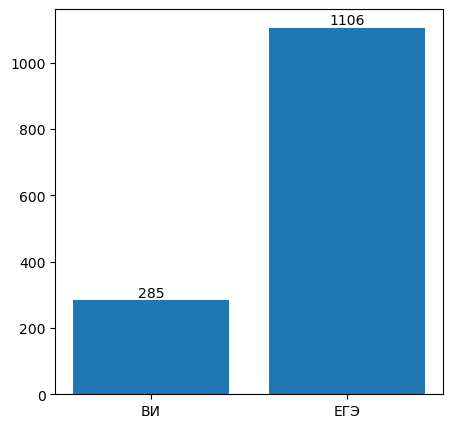

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(grouped['тип'], grouped['L_ID'] )
ax.bar_label(ax.containers[0], label_type='edge')

Баллы ЕГЭ и ВИ

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


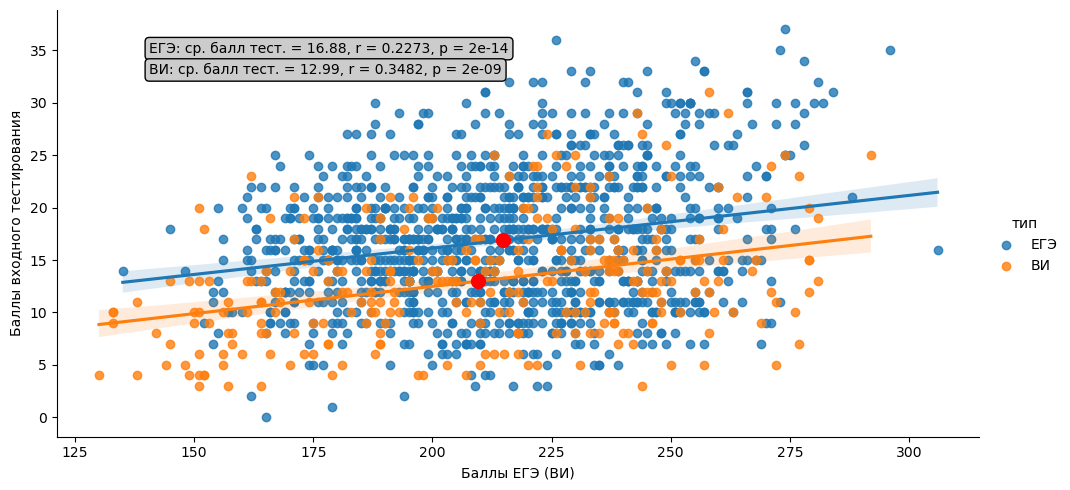

In [17]:
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
e_ege = np.mean(df_ege_test[df_ege_test['тип'] == 'ЕГЭ']['Баллы ЕГЭ (ВИ)'])
e_vi = np.mean(df_ege_test[df_ege_test['тип'] == 'ВИ']['Баллы ЕГЭ (ВИ)'])
test_ege = np.mean(df_ege_test[df_ege_test['тип'] == 'ЕГЭ']['Баллы входного тестирования'])
test_vi = np.mean(df_ege_test[df_ege_test['тип'] == 'ВИ']['Баллы входного тестирования'])
g = sns.lmplot(data=df_ege_test, x='Баллы ЕГЭ (ВИ)', y='Баллы входного тестирования', aspect=2, sharey=False, sharex=False, hue='тип')
r_ege, p_ege = stats.pearsonr(df_ege_test[df_ege_test['тип'] == 'ЕГЭ']['Баллы ЕГЭ (ВИ)'], df_ege_test[df_ege_test['тип'] == 'ЕГЭ']['Баллы входного тестирования'])
r_vi, p_vi = stats.pearsonr(df_ege_test[df_ege_test['тип'] == 'ВИ']['Баллы ЕГЭ (ВИ)'], df_ege_test[df_ege_test['тип'] == 'ВИ']['Баллы входного тестирования'])
plt.scatter(e_ege, test_ege, color='red', s=100, zorder=2)
plt.scatter(e_vi, test_vi, color='red', s=100,zorder=2)
plt.annotate('ЕГЭ: ср. балл тест. = {:.2f}, r = {:.4f}, p = {:.0e}'.format(test_ege, r_ege, p_ege), xy=(0.1, 0.9), xycoords='axes fraction', bbox = bbox)
plt.annotate('ВИ: ср. балл тест. = {:.2f}, r = {:.4f}, p = {:.0e}'.format(test_vi, r_vi, p_vi), xy=(0.1, 0.85), xycoords='axes fraction', bbox = bbox)
plt.show()

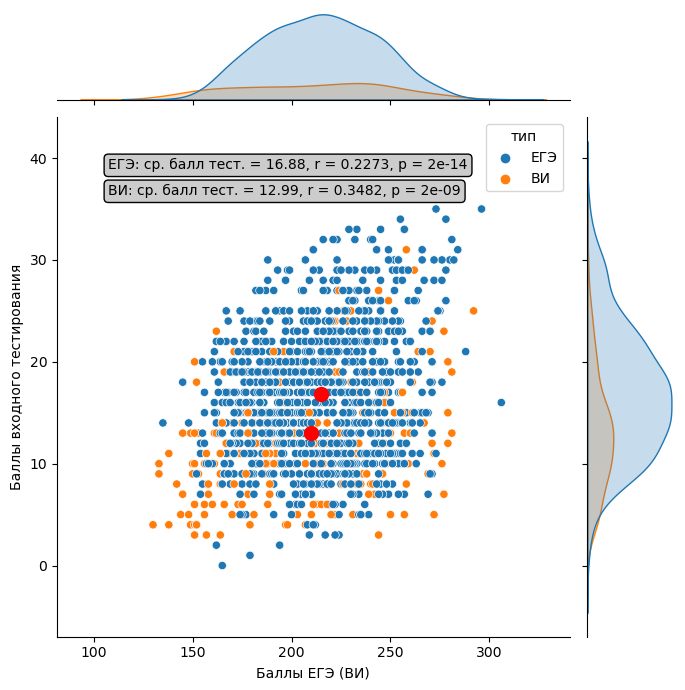

In [18]:
sns.jointplot(data=df_ege_test, x='Баллы ЕГЭ (ВИ)', y='Баллы входного тестирования', height=7, hue='тип')
plt.annotate('ЕГЭ: ср. балл тест. = {:.2f}, r = {:.4f}, p = {:.0e}'.format(test_ege, r_ege, p_ege), xy=(0.1, 0.9), xycoords='axes fraction', bbox = bbox)
plt.annotate('ВИ: ср. балл тест. = {:.2f}, r = {:.4f}, p = {:.0e}'.format(test_vi, r_vi, p_vi), xy=(0.1, 0.85), xycoords='axes fraction', bbox = bbox)
plt.scatter(e_ege, test_ege, color='red', s=100, zorder=2)
plt.scatter(e_vi, test_vi, color='red', s=100,zorder=2)
plt.show()

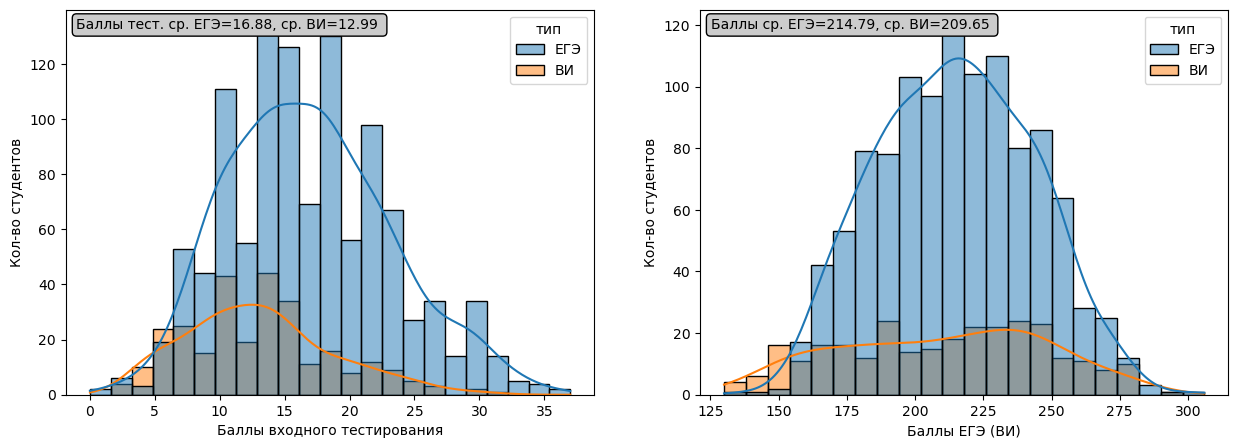

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
for ax in axes:
    ax.set(ylabel="Кол-во студентов")
sns.histplot(data=df_ege_test, x="Баллы входного тестирования", kde=True, ax=axes[0], hue='тип')
annotate_mean_test(axes[0], df_ege_test)
sns.histplot(data=df_ege_test, x="Баллы ЕГЭ (ВИ)", kde=True,  ax=axes[1], hue='тип')
annotate_mean_ege(axes[1], df_ege_test)

Отдельно баллы ЕГЭ и баллы ВИ

In [20]:
df_ege_test_ege = df_ege_test[df_ege_test['Б.1.И'] == 'ЕГЭ']
df_ege_test_ege = df_ege_test_ege.rename(columns={"Баллы ЕГЭ (ВИ)": "Баллы ЕГЭ"})

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


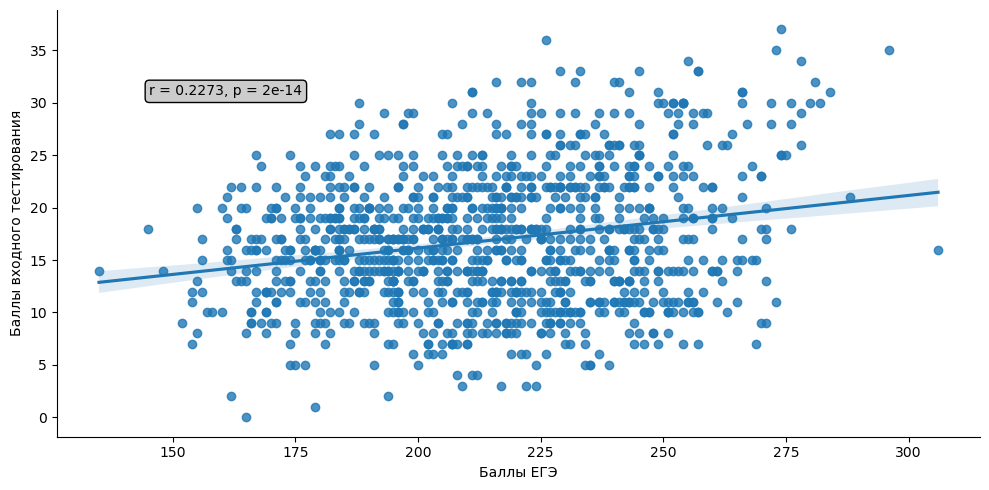

In [21]:
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
g = sns.lmplot(data=df_ege_test_ege, x='Баллы ЕГЭ', y='Баллы входного тестирования', aspect=2, sharey=False, sharex=False)
r, p = stats.pearsonr(df_ege_test_ege['Баллы ЕГЭ'], df_ege_test_ege['Баллы входного тестирования'])
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.show()

In [22]:
df_ege_test_vi = df_ege_test[df_ege_test['Б.1.И'] != 'ЕГЭ']
df_ege_test_vi = df_ege_test_vi.rename(columns={"Баллы ЕГЭ (ВИ)": "Баллы ВИ"})

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


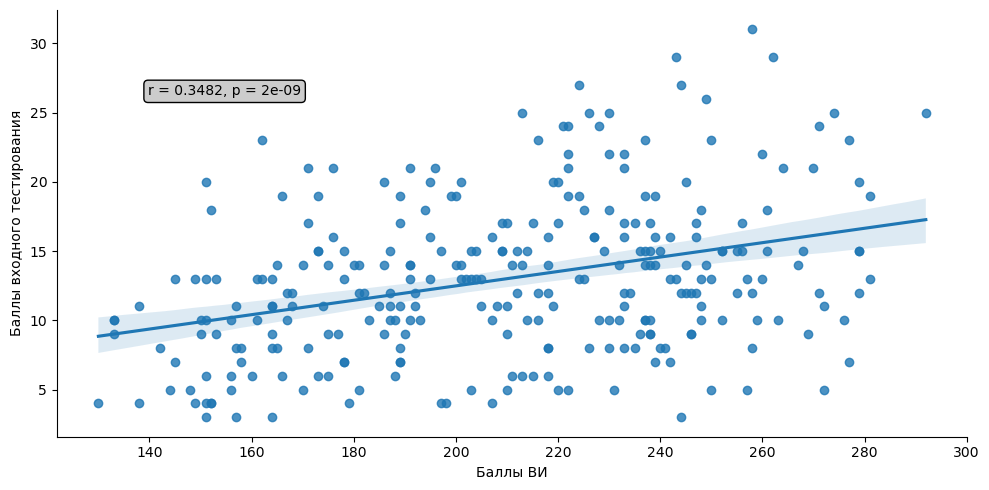

In [23]:
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
g = sns.lmplot(data=df_ege_test_vi, x='Баллы ВИ', y='Баллы входного тестирования', aspect=2, sharey=False, sharex=False)
r, p = stats.pearsonr(df_ege_test_vi['Баллы ВИ'], df_ege_test_vi['Баллы входного тестирования'])
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.show()

In [24]:
df_ege_disc = df_ege_raw[df_ege_raw['Б.1.И'] == "ЕГЭ"]

In [25]:
df_ege_disc = df_ege_disc[['Б.1.Д', 'Б.1', 'Б.2.Д', 'Б.2', 'Б.3.Д', 'Б.3']]
df_ege_disc_1 = df_ege_disc[['Б.1.Д', 'Б.1']]
df_ege_disc_1 = df_ege_disc_1.rename(columns={"Б.1.Д": "Дисциплина", "Б.1": "Баллы ЕГЭ"})
df_ege_disc_2 = df_ege_disc[['Б.2.Д', 'Б.2']]
df_ege_disc_2 = df_ege_disc_2.rename(columns={"Б.2.Д": "Дисциплина", "Б.2": "Баллы ЕГЭ"})
df_ege_disc_3 = df_ege_disc[['Б.3.Д', 'Б.3']]
df_ege_disc_3 = df_ege_disc_3.rename(columns={"Б.3.Д": "Дисциплина", "Б.3": "Баллы ЕГЭ"})
df_ege_disc_all = pd.concat([df_ege_disc_1, df_ege_disc_2, df_ege_disc_3])

In [26]:
unique_disc = df_ege_disc_all['Дисциплина'].unique()
list(unique_disc)

['ИиИ', 'Х', 'Ф', 'М', 'Б', 'Г', 'ОКН', 'МОТН', 'О', 'РЯ']

In [27]:
fiter_list = ['ИиИ', 'Х', 'Ф', 'М']

In [28]:
df_ege_disc_all  = df_ege_disc_all[df_ege_disc_all['Дисциплина'].isin(fiter_list)]
df_ege_disc_all = df_ege_disc_all.reset_index()
df_ege_disc_all = df_ege_disc_all.replace({'ИиИ': 'Информатика', 'Х': 'Химия', "М": "Математика", 'Ф' : 'Физика'})

In [29]:
df_test_disc = df_test_raw[['Математика', 'Физика', 'Химия', 'Информатика']]
#df_test_disc = df_test_disc.rename(columns={"Математика": "М", "Физика": "Ф", "Химия": "Х", "Информатика": "ИиИ" })
df_test_disc = pd.melt(df_test_disc, ignore_index = False, value_vars=['Математика', 'Физика', 'Химия', 'Информатика'])
df_test_disc = df_test_disc.reset_index()

In [30]:
df_ege_disc_all = df_ege_disc_all.merge(df_test_disc, left_on=['L_ID', 'Дисциплина'], right_on=['ID', 'variable'])
df_ege_disc_all = df_ege_disc_all[['L_ID', 'Дисциплина', 'Баллы ЕГЭ', 'value']]
df_ege_disc_all = df_ege_disc_all.rename(columns={'value': 'Баллы тестирования'})

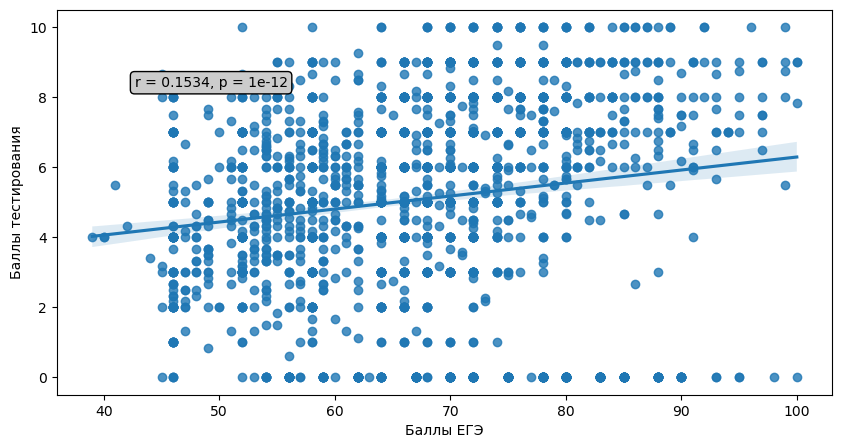

In [31]:
plt.figure(figsize=(10,5))
sns.regplot(data=df_ege_disc_all, x='Баллы ЕГЭ', y='Баллы тестирования')
#sns.relplot(data=df_ege_disc_all, x='Баллы ЕГЭ', y='Баллы тестирования', col = 'Дисциплина',  kind="scatter")
r, p = stats.pearsonr(df_ege_disc_all['Баллы ЕГЭ'], df_ege_disc_all['Баллы тестирования'])
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.show()

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


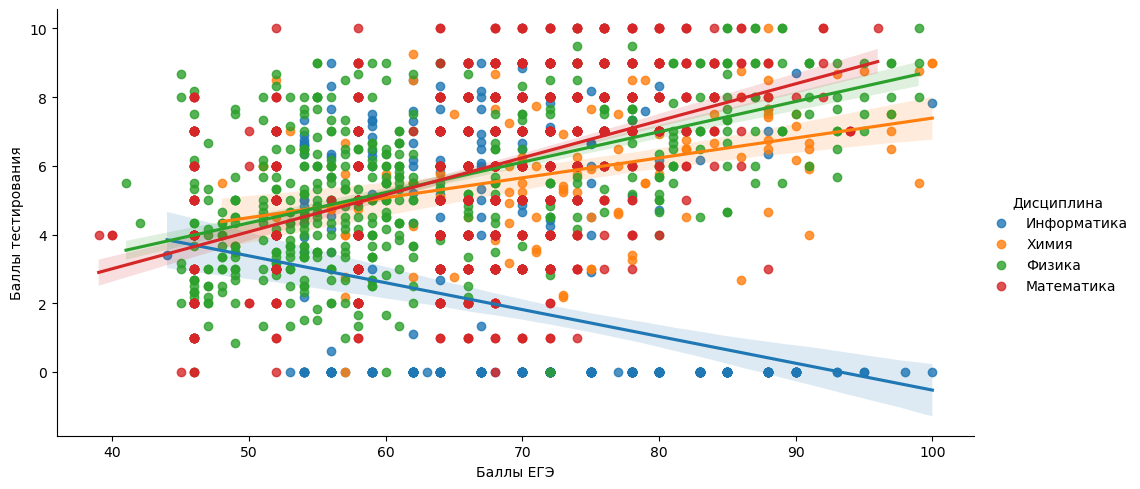

In [32]:
sns.lmplot(data=df_ege_disc_all, x='Баллы ЕГЭ', y='Баллы тестирования', aspect=2, sharey=False, sharex=False,  hue="Дисциплина")

In [33]:
df_ege_disc_all = df_ege_disc_all[df_ege_disc_all['Баллы тестирования'] > 0]

In [34]:
df_ege_math = df_ege_disc_all[df_ege_disc_all['Дисциплина'] == 'Математика']
df_ege_phys = df_ege_disc_all[df_ege_disc_all['Дисциплина'] == 'Физика']
df_ege_chem = df_ege_disc_all[df_ege_disc_all['Дисциплина'] == 'Химия']
df_ege_info = df_ege_disc_all[df_ege_disc_all['Дисциплина'] == 'Информатика']

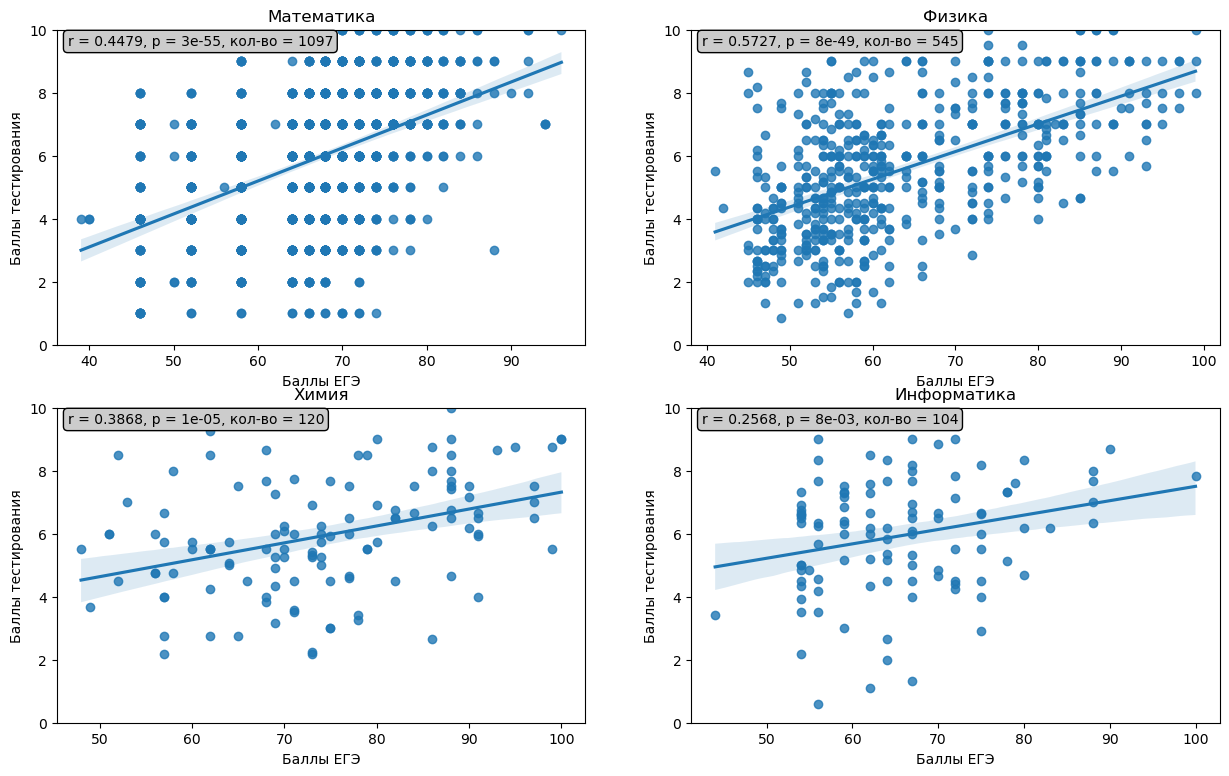

In [35]:
fig, axes = plt.subplots(2, 2, figsize = (15,9)) #, sharey=True)

ax = sns.regplot(data=df_ege_math, x='Баллы ЕГЭ', y='Баллы тестирования', ax=axes[0][0])
annotate(ax,data=df_ege_math)

ax = sns.regplot(data=df_ege_phys, x='Баллы ЕГЭ', y='Баллы тестирования', ax=axes[0][1])
annotate(ax,data=df_ege_phys)

ax = sns.regplot(data=df_ege_chem, x='Баллы ЕГЭ', y='Баллы тестирования', ax=axes[1][0])
annotate(ax,data=df_ege_chem)

ax = sns.regplot(data=df_ege_info, x='Баллы ЕГЭ', y='Баллы тестирования', ax=axes[1][1])
annotate(ax,data=df_ege_info)
#plt.tight_layout()
plt.show()

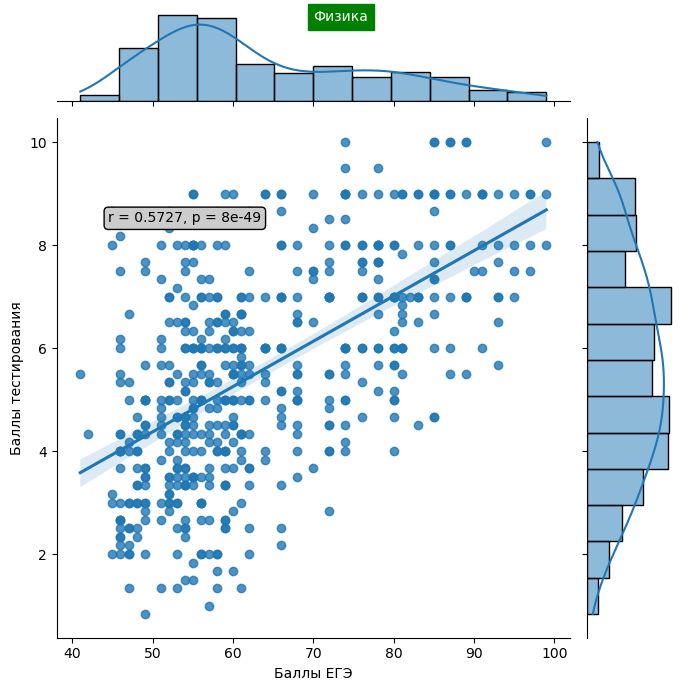

In [36]:
sns.jointplot(data=df_ege_phys, x='Баллы ЕГЭ', y='Баллы тестирования', kind="reg", height=7)
r, p = stats.pearsonr(df_ege_phys['Баллы ЕГЭ'], df_ege_phys['Баллы тестирования'])
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.suptitle(df_ege_phys['Дисциплина'].unique()[0], fontsize=10, backgroundcolor='green', color='white', zorder =2)
plt.show()

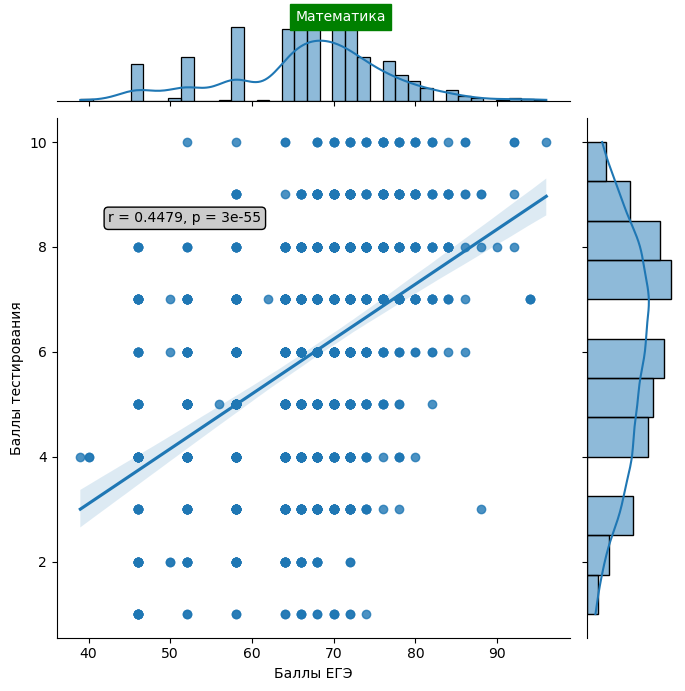

In [37]:
sns.jointplot(data=df_ege_math, x='Баллы ЕГЭ', y='Баллы тестирования', kind="reg", height=7)
r, p = stats.pearsonr(df_ege_math['Баллы ЕГЭ'], df_ege_math['Баллы тестирования'])
plt.suptitle(df_ege_math['Дисциплина'].unique()[0], fontsize=10, backgroundcolor='green', color='white', zorder =2)
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.show()

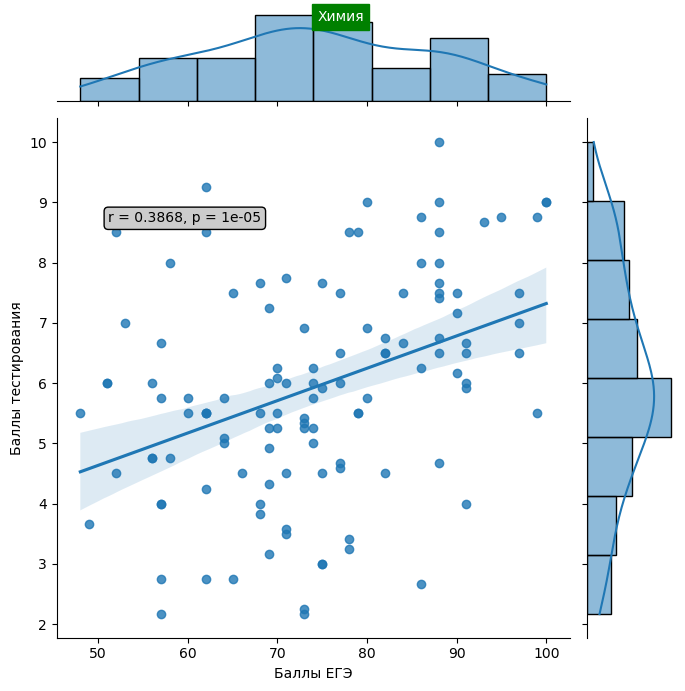

In [38]:
sns.jointplot(data=df_ege_chem, x='Баллы ЕГЭ', y='Баллы тестирования', kind="reg", height=7)
r, p = stats.pearsonr(df_ege_chem['Баллы ЕГЭ'], df_ege_chem['Баллы тестирования'])
plt.suptitle(df_ege_chem['Дисциплина'].unique()[0], fontsize=10, backgroundcolor='green', color='white', zorder =2)
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.show()

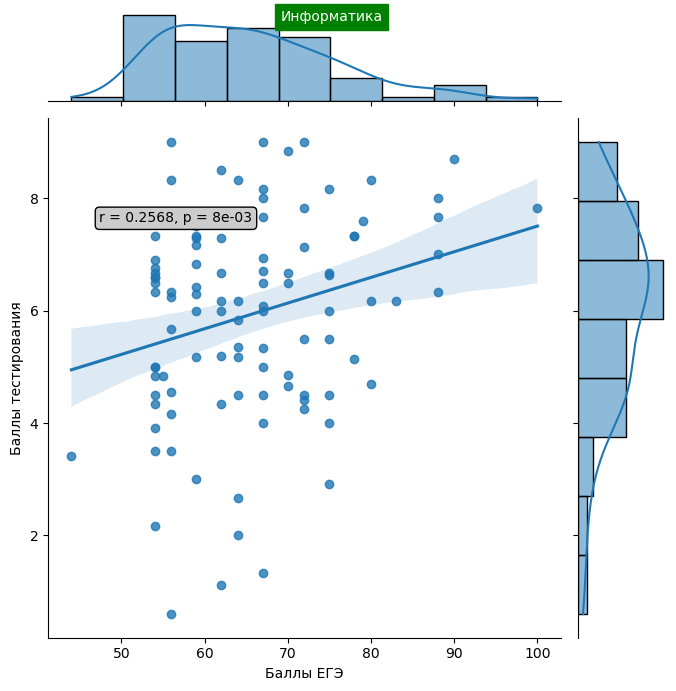

In [39]:
sns.jointplot(data=df_ege_info, x='Баллы ЕГЭ', y='Баллы тестирования', kind="reg", height=7)
r, p = stats.pearsonr(df_ege_info['Баллы ЕГЭ'], df_ege_info['Баллы тестирования'])
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.suptitle(df_ege_info['Дисциплина'].unique()[0], fontsize=10, backgroundcolor='green', color='white', zorder =2)
plt.show()

<Axes: title={'center': 'Физика'}, xlabel='Баллы ЕГЭ', ylabel='Count'>

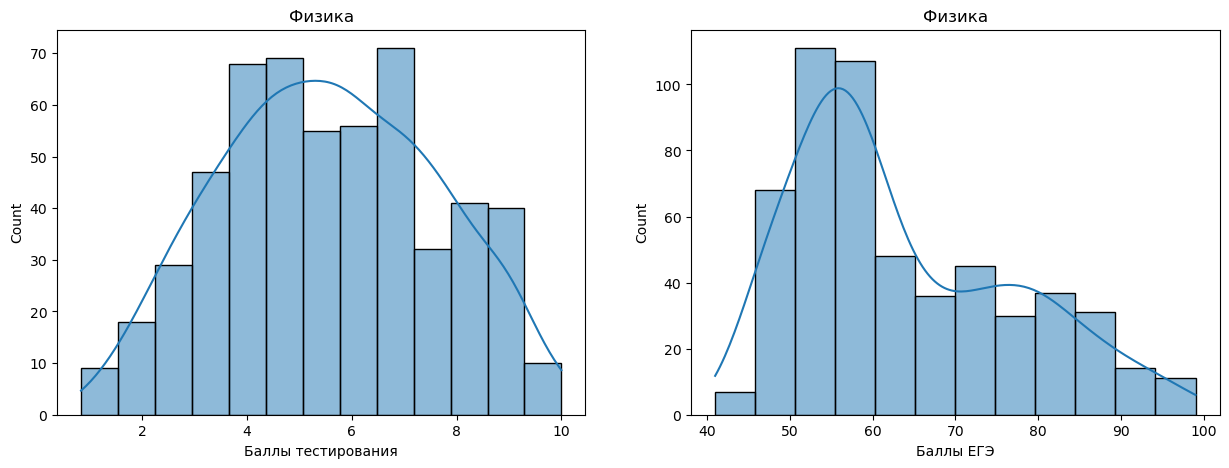

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
for ax in axes:
  ax.set_title(df_ege_phys['Дисциплина'].unique()[0])
sns.histplot(data=df_ege_phys, x="Баллы тестирования", kde=True, ax=axes[0])
sns.histplot(data=df_ege_phys, x="Баллы ЕГЭ", kde=True,  ax=axes[1])

<Axes: title={'center': 'Математика'}, xlabel='Баллы ЕГЭ', ylabel='Count'>

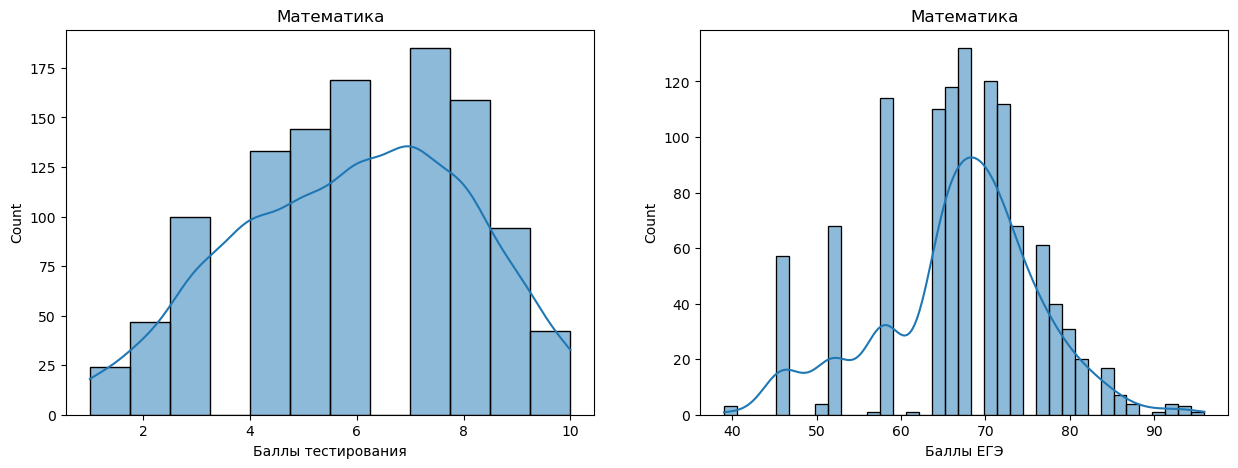

In [41]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
for ax in axes:
  ax.set_title(df_ege_math['Дисциплина'].unique()[0])
sns.histplot(data=df_ege_math, x="Баллы тестирования", kde=True, ax=axes[0])
sns.histplot(data=df_ege_math, x="Баллы ЕГЭ", kde=True,  ax=axes[1])

<Axes: title={'center': 'Химия'}, xlabel='Баллы ЕГЭ', ylabel='Count'>

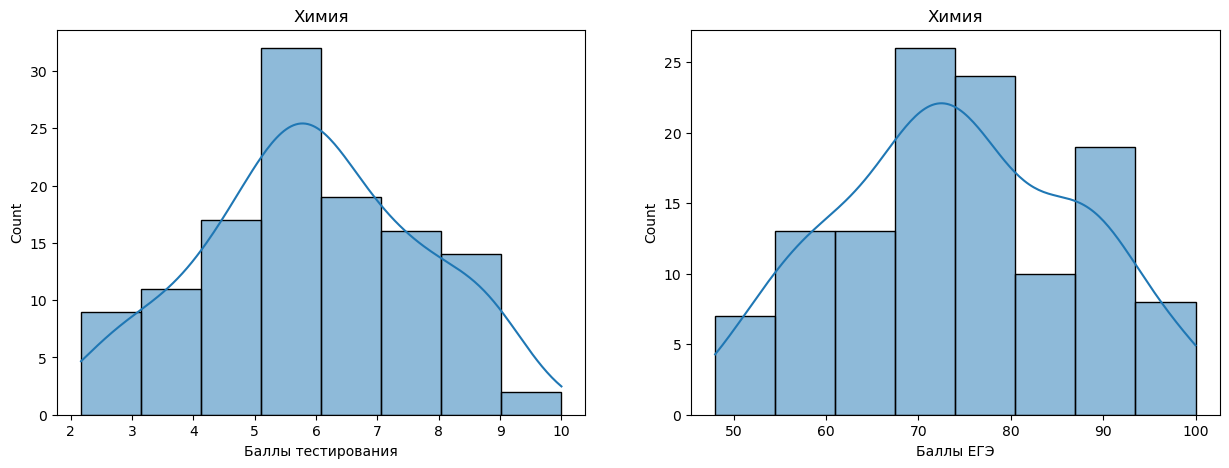

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
for ax in axes:
  ax.set_title(df_ege_chem['Дисциплина'].unique()[0])
sns.histplot(data=df_ege_chem, x="Баллы тестирования", kde=True, ax=axes[0])
sns.histplot(data=df_ege_chem, x="Баллы ЕГЭ", kde=True,  ax=axes[1])

<Axes: title={'center': 'Информатика'}, xlabel='Баллы ЕГЭ', ylabel='Count'>

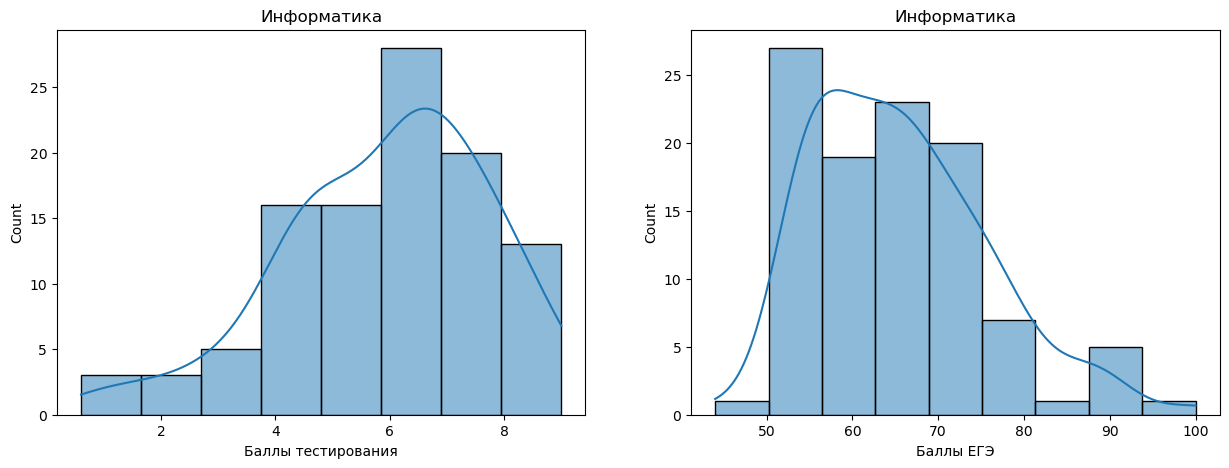

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
for ax in axes:
  ax.set_title(df_ege_info['Дисциплина'].unique()[0])
sns.histplot(data=df_ege_info, x="Баллы тестирования", kde=True, ax=axes[0])
sns.histplot(data=df_ege_info, x="Баллы ЕГЭ", kde=True,  ax=axes[1])

**Только иностранцы (гражданство != "RU")**

In [44]:
df_ege_raw

,Гражд,Группа,Сумма баллов,Б.1.Д,Б.1.И,Б.1,Б.2.Д,Б.2.И,Б.2,Б.3.Д,Б.3.И,Б.3,ИД
L_ID,,,,,,,,,,,,,
59086,RU,5А31-З,242,ФОТН,ВИспо,85,МОТН,ВИспо,75,РЯ,ВИ,82,NaN
109966,RU,8К33,249,ИиИ,ЕГЭ,88,М,ЕГЭ,74,РЯ,ЕГЭ,77,10.0
112994,RU,5Б35,144,Ф,ВИ,51,М,ВИ,47,РЯ,ВИ,46,NaN
121388,RU,8И32,186,ИиИ,ЕГЭ,62,М,ЕГЭ,52,РЯ,ЕГЭ,72,NaN
133491,RU,2Д32,215,Х,ЕГЭ,88,М,ЕГЭ,64,РЯ,ЕГЭ,63,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656166,RU,4В31,176,ФОТН,ВИспо,63,МОТН,ВИспо,52,РЯ,ВИ,61,NaN
656167,RU,0В32,131,МОТН,ВИспо,46,ФОТН,ВИспо,45,РЯ,ВИ,40,NaN
656169,RU,0В31,130,МОТН,ВИспо,45,ФОТН,ВИспо,45,РЯ,ВИ,40,NaN


In [45]:
df_ege_foreign = df_ege_raw[df_ege_raw['Гражд'] != 'RU']

In [46]:
df_ege_foreign

,Гражд,Группа,Сумма баллов,Б.1.Д,Б.1.И,Б.1,Б.2.Д,Б.2.И,Б.2,Б.3.Д,Б.3.И,Б.3,ИД
L_ID,,,,,,,,,,,,,
360962,KZ,1Б31,173,Ф,ВИ,45,М,ВИ,60,РЯ,ВИ,68,NaN
363163,KZ,1Е31,267,Ф,Оино,87,М,Оино,80,РЯ,Оино,100,NaN
554623,KZ,З-1Б31,215,Ф,Оино,55,М,Оино,60,РЯ,Оино,100,NaN
562093,KZ,2Э31,195,Ф,Оино,56,М,Оино,45,РЯ,Оино,94,NaN
568004,KZ,10А31,191,Ф,ВИ,77,М,ВИ,61,РЯ,ВИ,53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656093,TM,4Б32,136,Х,ВИ,48,М,ВИ,45,РЯ,ВИ,43,NaN
656097,TM,4Б32,144,Х,ВИ,50,М,ВИ,45,РЯ,ВИ,49,NaN
656100,TM,4Б32,138,Х,ВИ,48,М,ВИ,50,РЯ,ВИ,40,NaN


In [47]:
df_ege_foreign_test = df_ege_foreign.join(df_test_raw)
df_ege_foreign_test = df_ege_foreign_test[df_ege_foreign_test['Результат '].notna()]

In [48]:
df_ege_foreign_test

,Гражд,Группа,Сумма баллов,Б.1.Д,Б.1.И,Б.1,Б.2.Д,Б.2.И,Б.2,Б.3.Д,Б.3.И,Б.3,ИД,Результат,Математика,Физика,Химия,Информатика
L_ID,,,,,,,,,,,,,,,,,,
360962,KZ,1Б31,173,Ф,ВИ,45,М,ВИ,60,РЯ,ВИ,68,NaN,15.0,2.0,5.333333,3.500000,4.166666
363163,KZ,1Е31,267,Ф,Оино,87,М,Оино,80,РЯ,Оино,100,NaN,14.0,2.0,2.833333,4.583333,3.833333
562093,KZ,2Э31,195,Ф,Оино,56,М,Оино,45,РЯ,Оино,94,NaN,20.0,7.0,4.333334,5.000000,3.000000
568004,KZ,10А31,191,Ф,ВИ,77,М,ВИ,61,РЯ,ВИ,53,NaN,14.0,6.0,5.000000,1.333333,1.166666
605412,KZ,2Б35,230,Ф,Оино,65,М,Оино,65,РЯ,Оино,100,NaN,25.0,5.0,5.000000,9.000000,5.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654563,UZ,4Б32,145,Ф,Оино,50,М,Оино,45,РЯ,Оино,50,NaN,7.0,1.0,1.333333,2.250000,2.000000
654575,TJ,4Б32,152,Ф,Оино,57,М,Оино,45,РЯ,Оино,50,NaN,4.0,0.0,1.333333,1.000000,0.700000
654634,TJ,4В31,151,Ф,Оино,52,М,Оино,47,РЯ,Оино,52,NaN,13.0,6.0,1.666667,3.833333,0.733333


c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


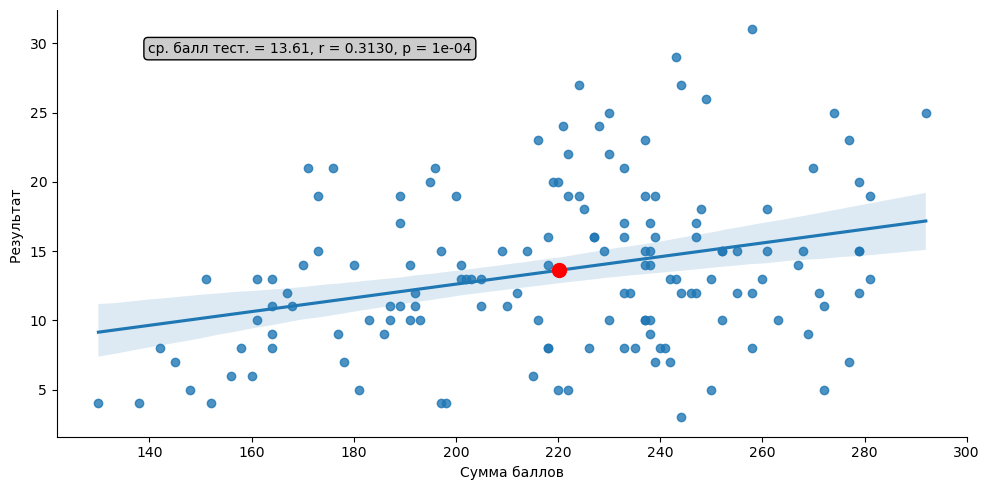

In [49]:
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
e_f = np.mean(df_ege_foreign_test['Сумма баллов'])
test_f = np.mean(df_ege_foreign_test['Результат '])
g_f = sns.lmplot(data=df_ege_foreign_test, x='Сумма баллов', y='Результат ', aspect=2, sharey=False, sharex=False)
r_f, p_f = stats.pearsonr(df_ege_foreign_test['Сумма баллов'], df_ege_foreign_test['Результат '])
plt.scatter(e_f, test_f, color='red', s=100, zorder=2)
plt.annotate('ср. балл тест. = {:.2f}, r = {:.4f}, p = {:.0e}'.format(test_f, r_f, p_f), xy=(0.1, 0.9), xycoords='axes fraction', bbox = bbox)
plt.show()

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


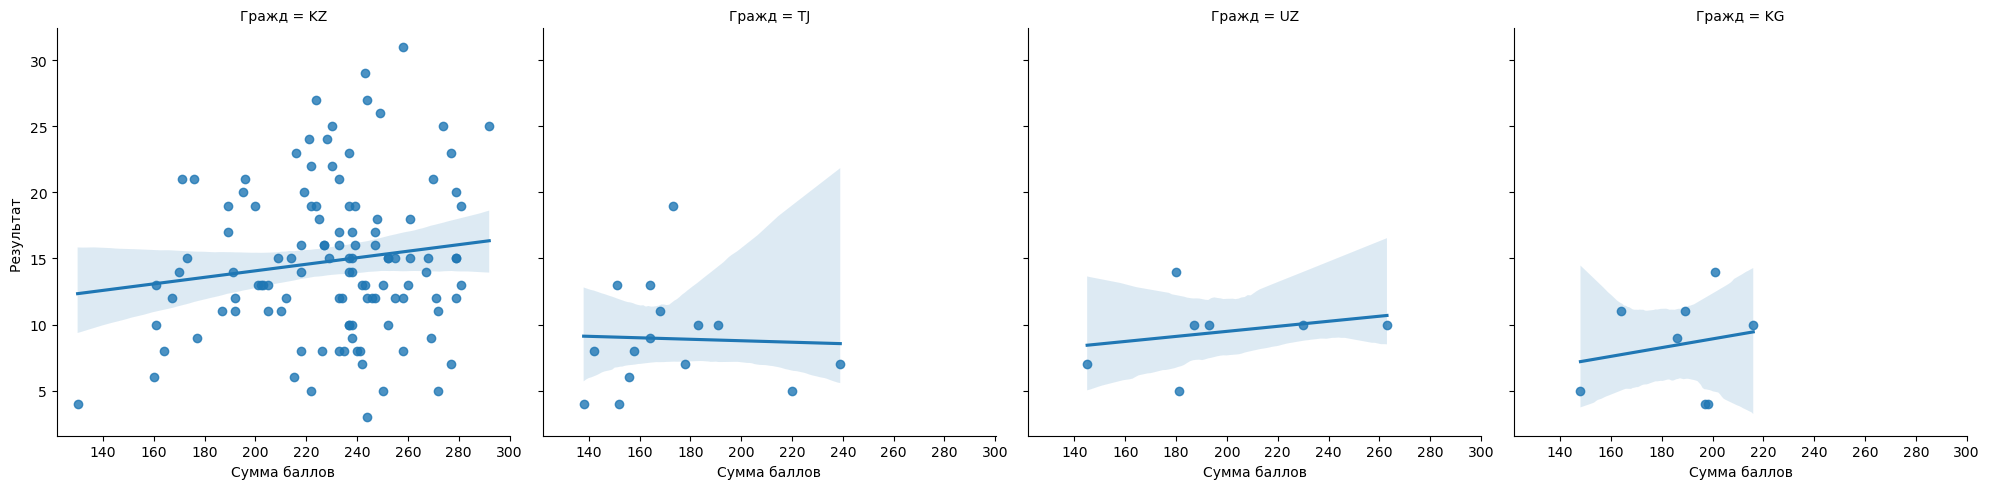

In [50]:
g_f = sns.lmplot(data=df_ege_foreign_test[df_ege_foreign_test['Гражд'] != 'TM'], x='Сумма баллов', y='Результат ', col='Гражд', height = 5)

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


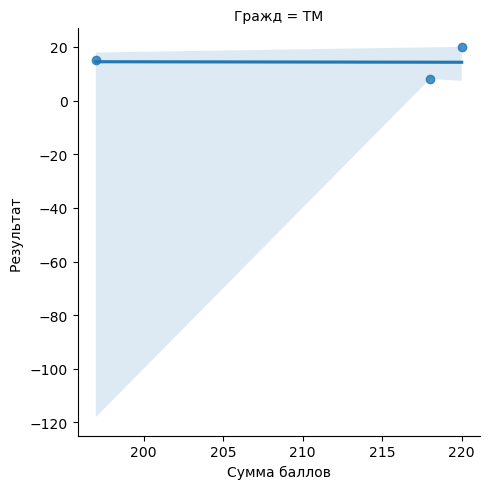

In [51]:
g_f = sns.lmplot(data=df_ege_foreign_test[df_ege_foreign_test['Гражд'] == 'TM'], x='Сумма баллов', y='Результат ', col='Гражд', height = 5)

In [52]:
df_ege_foreign_test_countries = df_ege_foreign_test

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


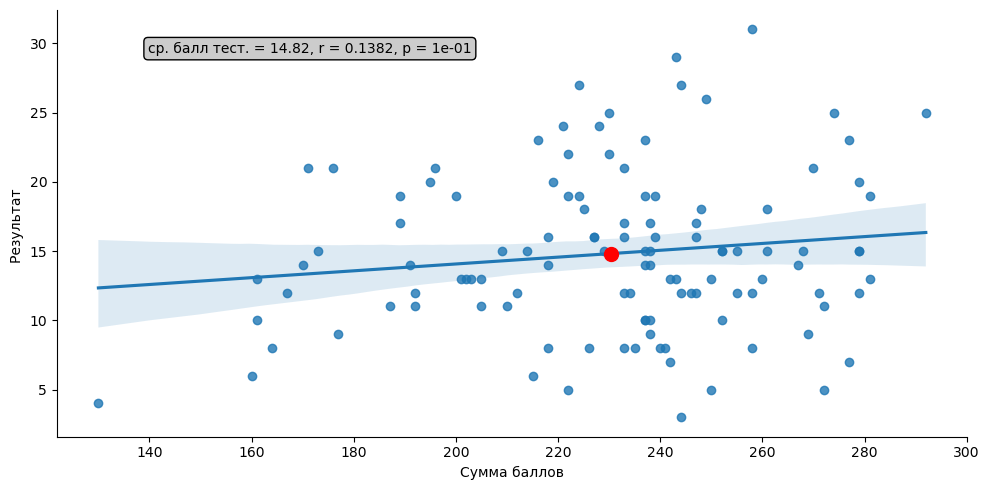

In [53]:
df_ege_foreign_test =  df_ege_foreign_test_countries[df_ege_foreign_test_countries['Гражд'] == 'KZ']
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
e_f = np.mean(df_ege_foreign_test['Сумма баллов'])
test_f = np.mean(df_ege_foreign_test['Результат '])
g_f = sns.lmplot(data=df_ege_foreign_test, x='Сумма баллов', y='Результат ', aspect=2, sharey=False, sharex=False)
r_f, p_f = stats.pearsonr(df_ege_foreign_test['Сумма баллов'], df_ege_foreign_test['Результат '])
plt.scatter(e_f, test_f, color='red', s=100, zorder=2)
plt.annotate('ср. балл тест. = {:.2f}, r = {:.4f}, p = {:.0e}'.format(test_f, r_f, p_f), xy=(0.1, 0.9), xycoords='axes fraction', bbox = bbox)
plt.show()

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


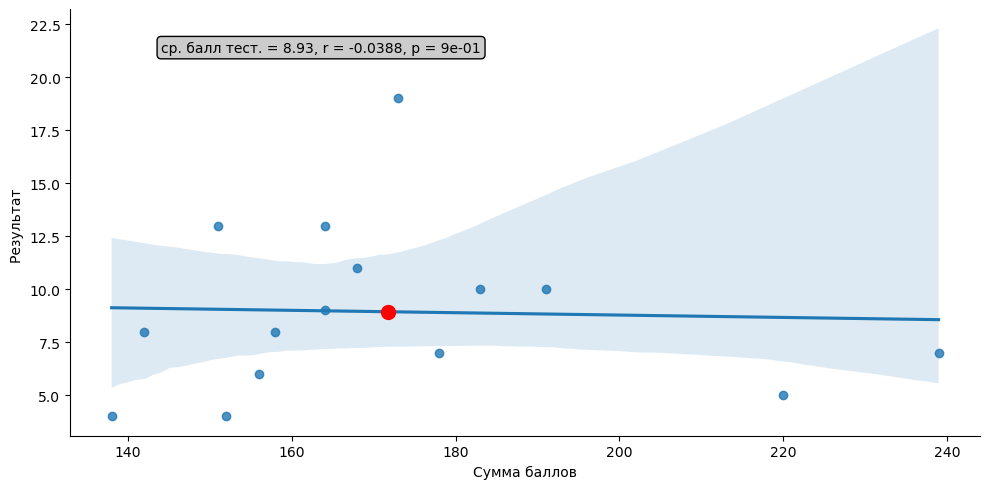

In [54]:
df_ege_foreign_test =  df_ege_foreign_test_countries[df_ege_foreign_test_countries['Гражд'] == 'TJ']
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
e_f = np.mean(df_ege_foreign_test['Сумма баллов'])
test_f = np.mean(df_ege_foreign_test['Результат '])
g_f = sns.lmplot(data=df_ege_foreign_test, x='Сумма баллов', y='Результат ', aspect=2, sharey=False, sharex=False)
r_f, p_f = stats.pearsonr(df_ege_foreign_test['Сумма баллов'], df_ege_foreign_test['Результат '])
plt.scatter(e_f, test_f, color='red', s=100, zorder=2)
plt.annotate('ср. балл тест. = {:.2f}, r = {:.4f}, p = {:.0e}'.format(test_f, r_f, p_f), xy=(0.1, 0.9), xycoords='axes fraction', bbox = bbox)
plt.show()

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


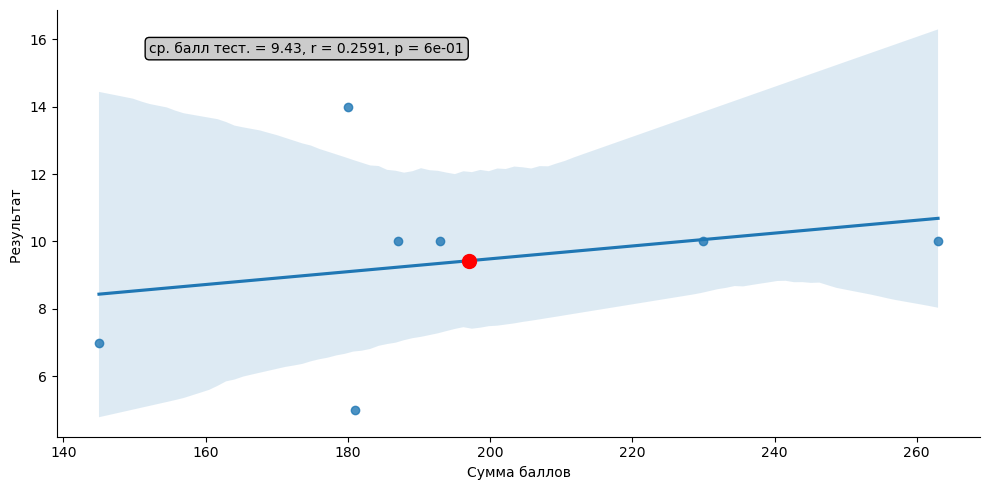

In [55]:
df_ege_foreign_test =  df_ege_foreign_test_countries[df_ege_foreign_test_countries['Гражд'] == 'UZ']
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
e_f = np.mean(df_ege_foreign_test['Сумма баллов'])
test_f = np.mean(df_ege_foreign_test['Результат '])
g_f = sns.lmplot(data=df_ege_foreign_test, x='Сумма баллов', y='Результат ', aspect=2, sharey=False, sharex=False)
r_f, p_f = stats.pearsonr(df_ege_foreign_test['Сумма баллов'], df_ege_foreign_test['Результат '])
plt.scatter(e_f, test_f, color='red', s=100, zorder=2)
plt.annotate('ср. балл тест. = {:.2f}, r = {:.4f}, p = {:.0e}'.format(test_f, r_f, p_f), xy=(0.1, 0.9), xycoords='axes fraction', bbox = bbox)
plt.show()

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


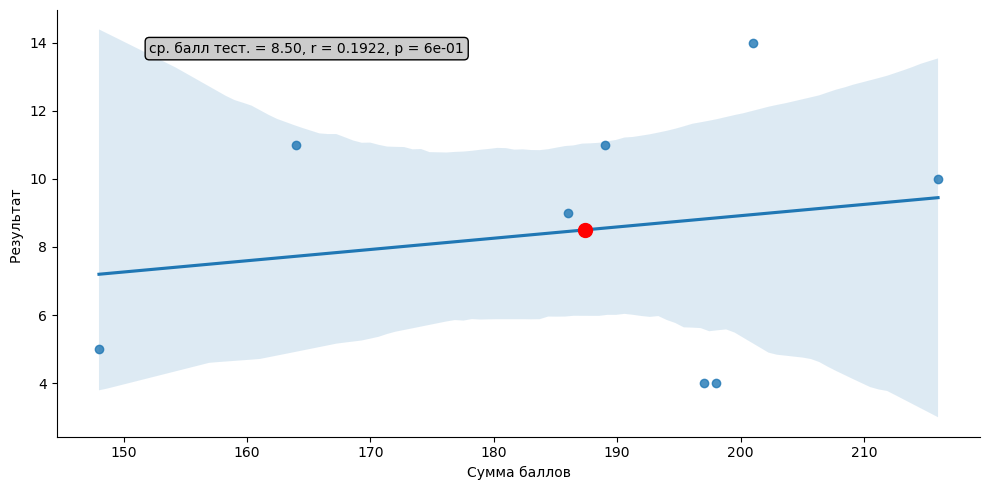

In [56]:
df_ege_foreign_test =  df_ege_foreign_test_countries[df_ege_foreign_test_countries['Гражд'] == 'KG']
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
e_f = np.mean(df_ege_foreign_test['Сумма баллов'])
test_f = np.mean(df_ege_foreign_test['Результат '])
g_f = sns.lmplot(data=df_ege_foreign_test, x='Сумма баллов', y='Результат ', aspect=2, sharey=False, sharex=False)
r_f, p_f = stats.pearsonr(df_ege_foreign_test['Сумма баллов'], df_ege_foreign_test['Результат '])
plt.scatter(e_f, test_f, color='red', s=100, zorder=2)
plt.annotate('ср. балл тест. = {:.2f}, r = {:.4f}, p = {:.0e}'.format(test_f, r_f, p_f), xy=(0.1, 0.9), xycoords='axes fraction', bbox = bbox)
plt.show()

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


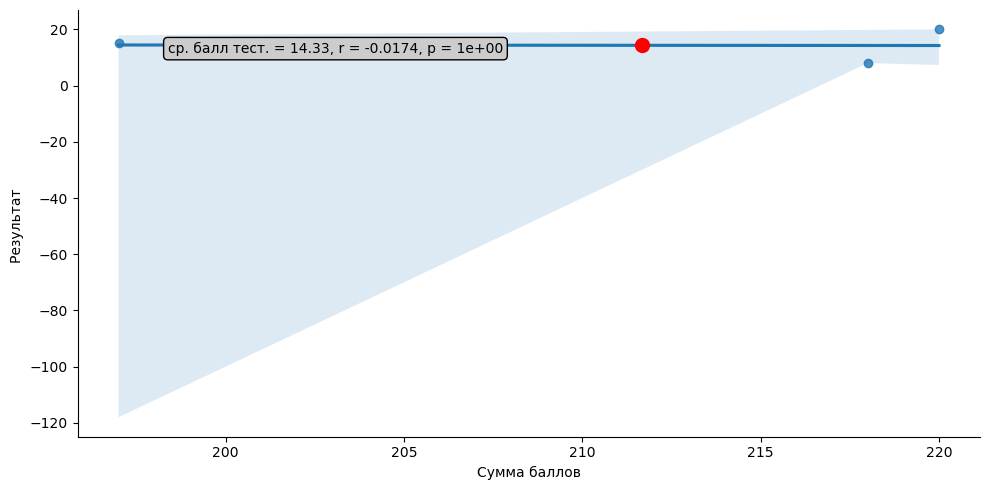

In [57]:
df_ege_foreign_test =  df_ege_foreign_test_countries[df_ege_foreign_test_countries['Гражд'] == 'TM']
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
e_f = np.mean(df_ege_foreign_test['Сумма баллов'])
test_f = np.mean(df_ege_foreign_test['Результат '])
g_f = sns.lmplot(data=df_ege_foreign_test, x='Сумма баллов', y='Результат ', aspect=2, sharey=False, sharex=False)
r_f, p_f = stats.pearsonr(df_ege_foreign_test['Сумма баллов'], df_ege_foreign_test['Результат '])
plt.scatter(e_f, test_f, color='red', s=100, zorder=2)
plt.annotate('ср. балл тест. = {:.2f}, r = {:.4f}, p = {:.0e}'.format(test_f, r_f, p_f), xy=(0.1, 0.9), xycoords='axes fraction', bbox = bbox)
plt.show()

<Axes: xlabel='Гражд', ylabel='Результат '>

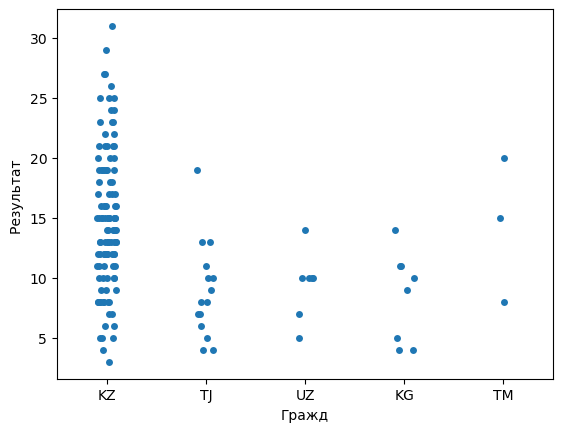

In [58]:
sns.stripplot(data=df_ege_foreign_test_countries, x="Гражд", y="Результат ")

<Axes: xlabel='Гражд', ylabel='Сумма баллов'>

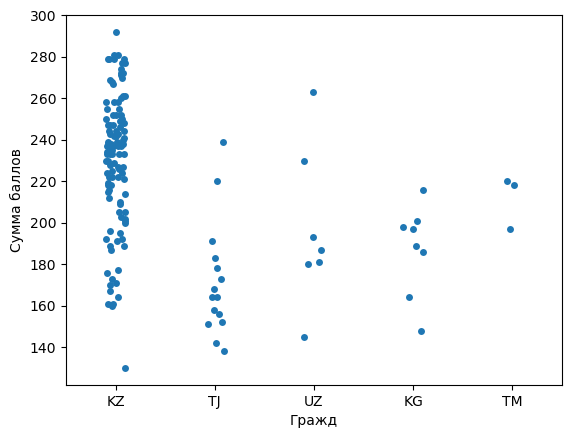

In [59]:
sns.stripplot(data=df_ege_foreign_test_countries, x="Гражд", y="Сумма баллов")